<a href="https://colab.research.google.com/github/ataei0/DANA/blob/master/pre1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Reading data**

First of all, we load our npz data to make sure what are its contents

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
from numpy import load

Data = load('/content/drive/MyDrive/Matrix Data/sparse_matrix.npz')
lst = Data.files
for item in lst:
    print(item)
    print(Data[item])

indices
[ 11103  31853  31854 ... 276253 368921 384959]
indptr
[        0       192       228 ... 113376415 113376545 113376558]
format
b'csr'
shape
[933095 398351]
data
[ 1.75086936 12.19738324 12.20355765 ... 18.7720261  34.64588635
 21.07869619]


We have a csr_matrix (row compressed) data;
to work with this data, we use scipy library as bellow

In [3]:
!pip install scipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from scipy import sparse
import numpy as np

temp_data = np.load('/content/drive/MyDrive/Matrix Data/sparse_matrix.npz')
M_data = sparse.csr_matrix((temp_data['data'], temp_data['indices'], temp_data['indptr']), shape = temp_data['shape']) 

In [21]:
M_data[3]

<1x398351 sparse matrix of type '<class 'numpy.float64'>'
	with 28 stored elements in Compressed Sparse Row format>

each row contains a lot of 0 terms, for getting a sense of our data we look at non-zero elemnts in it.

In [20]:
from scipy.sparse import csr_matrix
with open ('/content/drive/MyDrive/data0.txt', 'w') as f:
  for i in range(933095):
    f.write('Row: ' + str(i))
    f.write(str(csr_matrix(M_data[i])))
    f.write('\n')


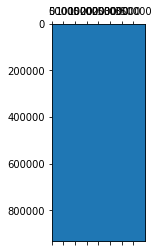

In [3]:
import matplotlib.pyplot as plt
plt.spy(M_data)
plt.show()

In [6]:
!pip install umap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
!pip install umap-learn[plot]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 18.2 MB 5.7 MB/s 
     |████████████████████████████████| 76 kB 6.1 MB/s 
  Created wheel for datashape: filename=datashape-0.5.2-py3-none-any.whl size=59439 sha256=55718d4d83cf8f5648504e779caff20b374a30755fec61b1cb79abf970c32819
  Stored in directory: /root/.cache/pip/wheels/6d/79/c4/c425774559165f472d32e5ef592ff9a71179abb31f05dbc98b
Successfully built datashape


In [14]:
!pip uninstall umap
!pip install umap-learn

Found existing installation: umap 0.1.1
Uninstalling umap-0.1.1:
  Would remove:
    /usr/local/lib/python3.8/dist-packages/umap-0.1.1.dist-info/*
    /usr/local/lib/python3.8/dist-packages/umap/*
  Would not remove (might be manually added):
    /usr/local/lib/python3.8/dist-packages/umap/__pycache__/layouts.rdist-30.py38.1.nbc
    /usr/local/lib/python3.8/dist-packages/umap/__pycache__/layouts.rdist-30.py38.nbi
    /usr/local/lib/python3.8/dist-packages/umap/aligned_umap.py
    /usr/local/lib/python3.8/dist-packages/umap/distances.py
    /usr/local/lib/python3.8/dist-packages/umap/layouts.py
    /usr/local/lib/python3.8/dist-packages/umap/parametric_umap.py
    /usr/local/lib/python3.8/dist-packages/umap/plot.py
    /usr/local/lib/python3.8/dist-packages/umap/sparse.py
    /usr/local/lib/python3.8/dist-packages/umap/spectral.py
    /usr/local/lib/python3.8/dist-packages/umap/umap_.py
    /usr/local/lib/python3.8/dist-packages/umap/utils.py
    /usr/local/lib/python3.8/dist-packages/u

In [ ]:
import umap.umap_ as umap
import matplotlib.pyplot as plt

mapper = umap.UMAP(metric='cosine', random_state=42, low_memory=True).fit(M_data)
umap.plot.points(mapper, values=np.arange(900000), theme='viridis')

In [10]:
from scipy.sparse import csr_matrix
print(csr_matrix(M_data[1]))

  (0, 2274)	8.682397432067377
  (0, 2944)	25.109188786557834
  (0, 2961)	35.035771430725895
  (0, 2962)	41.41497281731176
  (0, 2963)	41.41497281731176
  (0, 11103)	8.970512939158844
  (0, 11622)	28.331012251916007
  (0, 11628)	33.23365550493392
  (0, 11629)	33.23365550493392
  (0, 11630)	33.23365550493392
  (0, 93658)	34.67543684259214
  (0, 107036)	9.811447961383472
  (0, 173596)	7.714913049103346
  (0, 174727)	16.242677377488587
  (0, 174762)	21.348454546017916
  (0, 174765)	21.372079587193586
  (0, 174766)	21.372079587193586
  (0, 212722)	14.057631672655347
  (0, 253273)	16.321194287465744
  (0, 253274)	24.587771780271105
  (0, 253283)	25.416309056872667
  (0, 253298)	35.14555924811861
  (0, 253299)	41.41497281731176
  (0, 259353)	12.720544496779981
  (0, 259494)	25.66157450701968
  (0, 259495)	33.96429057965418
  (0, 259496)	34.00492766453549
  (0, 259497)	34.00492766453549
  (0, 344820)	20.179325596802006
  (0, 344828)	21.370763095766456
  (0, 344829)	21.370763095766456
  (0, 358